# Base de données de l'étude 

## Phase 1: Récupération et Visualisation des Régions de France

Ce code télécharge les données géographiques des régions françaises, calcule leurs centroïdes et affiche une carte. Les centroïdes sont extraits pour chaque région et stockés sous forme de triplets (region, longitude, latitude) pour une utilisation ultérieure.

In [106]:
#Installation des bibliothèques nécessaires pour la récupération et la représentation des données géographiques
!pip install contextily && geopandas &&  topojson && py7zr && openpyxl && tqdm && s3fs && pandas && fiona && shapely && pyproj && rtree
!pip install PyYAML xlrd && git+https://github.com/inseefrlab/cartiflette && git+https://github.com/inseeFrLab/cartiflette.git && openmeteo-requests
!pip install requests-cache retry-requests 
!pip install geopandas
!pip install cartiflette

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [107]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [108]:
# Récupératoin des données 

from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)


In [109]:
france.head()

,INSEE_REG,PAYS,LIBELLE_REGION,POPULATION,SOURCE,geometry
0,1,France,Guadeloupe,384239,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ..."
1,3,France,Guyane,281678,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4...."
2,2,France,Martinique,364508,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14..."
3,6,France,Mayotte,256518,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -..."
4,84,France,Auvergne-Rhône-Alpes,8042936,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6..."


In [110]:
print(france.crs)

EPSG:4326


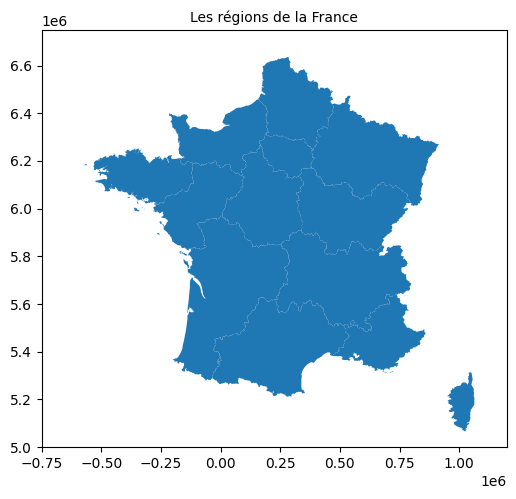

In [111]:
#REPRESENTATION 

if france.crs.to_string() != "EPSG:3857":
    france = france.to_crs(epsg=3857)
#Les  limites de la carte
xmin, xmax = -0.75e6, 1.2e6  # Convertir les limites en mètres (EPSG:3857)
ymin, ymax = 5e6, 6.75e6

#Ploting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Les régions de la France", fontsize=10)
plt.show()


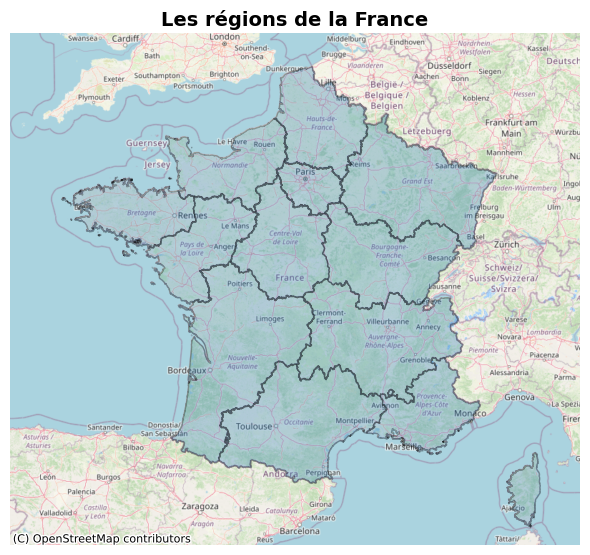

In [112]:
# Ajout d'un fond de carte pour un meilleur contexte géographique
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
#
plt.title("Les régions de la France", fontsize=14, fontweight='bold')
ax.axis('off') 

plt.tight_layout() 
plt.show()


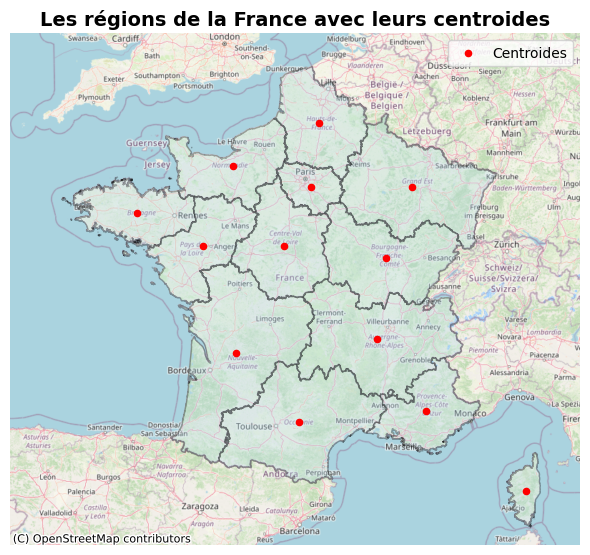

In [113]:
#Représentation des centroides 
france['centroid'] = france.geometry.centroid
france['longitude'] = france.centroid.x
france['latitude'] = france.centroid.y
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3, color='lightblue')
ax.scatter(france['longitude'], france['latitude'], color='red', s=20, label='Centroides')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
plt.title("Les régions de la France avec leurs centroides", fontsize=14, fontweight='bold')
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

In [114]:
# Calcul des longitudes et latitudes 
france = france.to_crs(epsg=4326)
france['longitude'] = france.geometry.centroid.x
france['latitude'] = france.geometry.centroid.y
print(france[['LIBELLE_REGION', 'longitude', 'latitude']])


                LIBELLE_REGION  longitude   latitude
0                   Guadeloupe -61.539833  16.197646
1                       Guyane -53.239940   3.915167
2                   Martinique -61.019379  14.654871
3                      Mayotte  45.147435 -12.820617
4         Auvergne-Rhône-Alpes   4.536119  45.514642
5                    Occitanie   2.143923  43.702500
6                     Bretagne  -2.841463  48.177549
7           Nouvelle-Aquitaine   0.212719  45.206040
8                    Normandie   0.110932  49.120067
9   Provence-Alpes-Côte d'Azur   6.061005  43.958789
10            Pays de la Loire  -0.816786  47.478104
11                   Grand Est   5.613112  48.688977
12     Bourgogne-Franche-Comté   4.806857  47.234282
13               Île-de-France   2.503401  48.709316
14         Centre-Val de Loire   1.684391  47.484775
15             Hauts-de-France   2.771303  49.969594
16                       Corse   9.106152  42.151511
17                  La Réunion  55.532509 -21.

C:\Users\steph\AppData\Local\Temp\ipykernel_22664\2487130668.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['longitude'] = france.geometry.centroid.x
C:\Users\steph\AppData\Local\Temp\ipykernel_22664\2487130668.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['latitude'] = france.geometry.centroid.y


In [115]:
france.head()

,INSEE_REG,PAYS,LIBELLE_REGION,POPULATION,SOURCE,geometry,centroid,longitude,latitude
0,1,France,Guadeloupe,384239,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...",POINT (-6850582.542 1827642.261),-61.539833,16.197646
1,3,France,Guyane,281678,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....",POINT (-5926644.81 436331.726),-53.239940,3.915167
2,2,France,Martinique,364508,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...",POINT (-6792650.367 1649468.223),-61.019379,14.654871
3,6,France,Mayotte,256518,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...",POINT (5025789.843 -1439250.269),45.147435,-12.820617
4,84,France,Auvergne-Rhône-Alpes,8042936,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...",POINT (504837.95 5704315.458),4.536119,45.514642


In [116]:
# Création de la liste de triplets (région, longitude, latitude)
region_centroides = []
for index, row in france.iterrows():
    region = row['LIBELLE_REGION']  # Nom de la région
    longitude = row['longitude']  # Longitude du centroïde
    latitude = row['latitude']    # Latitude du centroïde
    region_centroides.append((region, longitude, latitude)) # Ajout du triplet à la liste
region_centroides

[('Guadeloupe', -61.53983304107784, 16.197645826552904),
 ('Guyane', -53.23993971851178, 3.915166862499844),
 ('Martinique', -61.019378740773654, 14.654870858984358),
 ('Mayotte', 45.14743542382146, -12.820616875536656),
 ('Auvergne-Rhône-Alpes', 4.536118586333609, 45.51464202656834),
 ('Occitanie', 2.143922833937654, 43.70250024549978),
 ('Bretagne', -2.841462676465886, 48.17754922086023),
 ('Nouvelle-Aquitaine', 0.21271860548694332, 45.2060395396088),
 ('Normandie', 0.11093239896467046, 49.12006667987373),
 ("Provence-Alpes-Côte d'Azur", 6.061004522552231, 43.95878857291765),
 ('Pays de la Loire', -0.81678598261894, 47.47810354487287),
 ('Grand Est', 5.613112231600144, 48.68897740160863),
 ('Bourgogne-Franche-Comté', 4.806856915301157, 47.2342819451994),
 ('Île-de-France', 2.503401392552759, 48.70931550109074),
 ('Centre-Val de Loire', 1.684391322381998, 47.48477508284454),
 ('Hauts-de-France', 2.7713028658475474, 49.969593961262426),
 ('Corse', 9.106151755156151, 42.15151137562012),

##  Phase 2: Collecte des Données de Qualité de l'Air
Ce script Python permet de collecter des données horaires de qualité de l'air via l'API Open-Meteo pour plusieurs régions géographiques. Il utilise une session avec cache et des mécanismes de répétition pour garantir la fiabilité des requêtes. Les données récupérées (PM10, PM2.5, CO, CO2, NO2, SO2, Ozone) sont organisées dans des DataFrames pandas, puis combinées en un seul tableau pour faciliter l'analyse. Une colonne supplémentaire est ajoutée pour extraire les dates sans les heures.

Une fois les données consolidées, elles sont agrégées par jour et par région en calculant la moyenne des valeurs horaires pour chaque polluant. Cette étape permet de simplifier les données tout en conservant une vue quotidienne des concentrations moyennes par région.



In [117]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from openmeteo_requests import Client


# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://air-quality-api.open-meteo.com/v1/air-quality"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "current": ["european_aqi", "us_aqi"],
            "hourly": ["pm10", "pm2_5", "carbon_monoxide", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"],
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "pm10": hourly.Variables(0).ValuesAsNumpy(),
            "pm2_5": hourly.Variables(1).ValuesAsNumpy(),
            "carbon_monoxide": hourly.Variables(2).ValuesAsNumpy(),
            "carbon_dioxide": hourly.Variables(3).ValuesAsNumpy(),
            "nitrogen_dioxide": hourly.Variables(4).ValuesAsNumpy(),
            "sulphur_dioxide": hourly.Variables(5).ValuesAsNumpy(),
            "ozone": hourly.Variables(6).ValuesAsNumpy()
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")

# Concaténation tous les DataFrames
combined_dataframe_air = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_air['date'] = pd.to_datetime(combined_dataframe_air['date'])
# Création d'une nouvelle colonne 'day' contenant uniquement la date (sans l'heure)
#combined_dataframe_air['day'] = combined_dataframe_air['date'].dt.date
combined_dataframe_air.insert(1,"day",combined_dataframe_air["date"].dt.date)



In [118]:
combined_dataframe_air

,date,day,region,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2023-01-01 00:00:00+00:00,2023-01-01,Guadeloupe,20.500000,11.3,89.0,NaN,3.70,0.30,62.0
1,2023-01-01 01:00:00+00:00,2023-01-01,Guadeloupe,21.700001,11.9,89.0,NaN,3.45,0.30,62.0
2,2023-01-01 02:00:00+00:00,2023-01-01,Guadeloupe,21.799999,12.0,88.0,NaN,3.15,0.25,63.0
3,2023-01-01 03:00:00+00:00,2023-01-01,Guadeloupe,20.700001,11.4,88.0,NaN,2.60,0.25,64.0
4,2023-01-01 04:00:00+00:00,2023-01-01,Guadeloupe,19.400000,10.7,88.0,NaN,2.10,0.25,64.0
...,...,...,...,...,...,...,...,...,...,...
302395,2024-11-30 19:00:00+00:00,2024-11-30,La Réunion,10.000000,7.1,100.0,459.0,3.60,2.50,56.0
302396,2024-11-30 20:00:00+00:00,2024-11-30,La Réunion,9.800000,7.1,95.0,455.0,4.20,2.30,52.0
302397,2024-11-30 21:00:00+00:00,2024-11-30,La Réunion,9.700000,7.0,91.0,453.0,4.50,2.20,49.0
302398,2024-11-30 22:00:00+00:00,2024-11-30,La Réunion,9.500000,6.9,90.0,455.0,4.40,2.10,47.0


In [119]:
# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://archive-api.open-meteo.com/v1/archive"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"],
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
            "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
            "precipitation": hourly.Variables(2).ValuesAsNumpy(),
            "surface_pressure": hourly.Variables(3).ValuesAsNumpy(),
            "wind_speed_10m": hourly.Variables(4).ValuesAsNumpy(),
            "soil_temperature_0_to_7cm": hourly.Variables(5).ValuesAsNumpy(),
            "soil_moisture_0_to_7cm": hourly.Variables(6).ValuesAsNumpy(),
            "longitude" : longitude,
            "latitude" : latitude
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")
        
    # Concaténation tous les DataFrames
combined_dataframe_climat = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_climat = combined_dataframe_climat.drop(columns=["region","date"])

In [146]:
df=pd.concat([combined_dataframe_air,combined_dataframe_climat],axis=1)
df

,date,day,region,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,longitude,latitude
0,2023-01-01 00:00:00+00:00,2023-01-01,Guadeloupe,20.500000,11.3,89.0,NaN,3.70,0.30,62.0,23.770000,84.863304,0.0,1017.400024,9.422101,24.020000,0.501,-61.539833,16.197646
1,2023-01-01 01:00:00+00:00,2023-01-01,Guadeloupe,21.700001,11.9,89.0,NaN,3.45,0.30,62.0,23.719999,85.643173,0.0,1017.599976,9.885262,23.670000,0.499,-61.539833,16.197646
2,2023-01-01 02:00:00+00:00,2023-01-01,Guadeloupe,21.799999,12.0,88.0,NaN,3.15,0.25,63.0,23.520000,86.947586,0.0,1017.700012,9.720000,23.420000,0.498,-61.539833,16.197646
3,2023-01-01 03:00:00+00:00,2023-01-01,Guadeloupe,20.700001,11.4,88.0,NaN,2.60,0.25,64.0,23.270000,88.269188,0.0,1017.400024,7.559999,23.219999,0.497,-61.539833,16.197646
4,2023-01-01 04:00:00+00:00,2023-01-01,Guadeloupe,19.400000,10.7,88.0,NaN,2.10,0.25,64.0,22.469999,94.082932,0.2,1017.299988,8.825508,23.020000,0.497,-61.539833,16.197646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302395,2024-11-30 19:00:00+00:00,2024-11-30,La Réunion,10.000000,7.1,100.0,459.0,3.60,2.50,56.0,10.291500,93.833534,0.0,824.523071,3.617955,12.941500,0.235,55.532509,-21.133203
302396,2024-11-30 20:00:00+00:00,2024-11-30,La Réunion,9.800000,7.1,95.0,455.0,4.20,2.30,52.0,9.891500,93.814590,0.0,823.957458,3.847960,12.441500,0.235,55.532509,-21.133203
302397,2024-11-30 21:00:00+00:00,2024-11-30,La Réunion,9.700000,7.0,91.0,453.0,4.50,2.20,49.0,9.391500,97.342743,0.0,823.007019,3.065289,11.991500,0.234,55.532509,-21.133203
302398,2024-11-30 22:00:00+00:00,2024-11-30,La Réunion,9.500000,6.9,90.0,455.0,4.40,2.10,47.0,8.891500,99.663048,0.0,822.137085,2.979530,11.591500,0.234,55.532509,-21.133203


In [121]:
# Agrégation par 'day' et 'region' en prenant la moyenne
df = df.groupby(['day', 'region']).mean().reset_index()

In [122]:
df.head()

,day,region,date,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,longitude,latitude
0,2023-01-01,Auvergne-Rhône-Alpes,2023-01-01 11:30:00+00:00,14.954166,7.858334,118.791664,NaN,3.475000,0.837500,62.250000,11.954083,71.024551,0.000000,964.791809,23.574928,10.964500,0.365333,4.536119,45.514642
1,2023-01-01,Bourgogne-Franche-Comté,2023-01-01 11:30:00+00:00,13.300000,7.737500,120.375000,NaN,3.795833,0.741667,59.541668,10.743833,77.391754,0.000000,963.939941,20.494823,9.506333,0.393667,4.806857,47.234282
2,2023-01-01,Bretagne,2023-01-01 11:30:00+00:00,9.845834,5.720833,128.666672,NaN,3.395833,0.270833,64.916664,10.547750,89.859863,0.358333,998.909729,18.512320,10.185250,0.420542,-2.841463,48.177549
3,2023-01-01,Centre-Val de Loire,2023-01-01 11:30:00+00:00,13.750000,7.679167,125.416664,NaN,2.837500,0.770833,52.958332,14.431666,66.970406,0.000000,1004.533508,18.958830,12.196250,0.262458,1.684391,47.484775
4,2023-01-01,Corse,2023-01-01 11:30:00+00:00,8.979167,5.345833,94.500000,NaN,2.208333,0.341667,52.833332,6.793917,73.633392,0.000000,841.699280,4.792229,3.352250,0.466958,9.106152,42.151511


In [123]:
df.shape

(12600, 19)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   day                        12600 non-null  object             
 1   region                     12600 non-null  object             
 2   date                       12600 non-null  datetime64[ns, UTC]
 3   pm10                       12600 non-null  float32            
 4   pm2_5                      12600 non-null  float32            
 5   carbon_monoxide            12600 non-null  float32            
 6   carbon_dioxide             648 non-null    float32            
 7   nitrogen_dioxide           12600 non-null  float32            
 8   sulphur_dioxide            12600 non-null  float32            
 9   ozone                      12600 non-null  float32            
 10  temperature_2m             12600 non-null  float32            
 11  re

la colonne carbon_dioxide  possède trop de valeurs manquantes. Nous allons donc supprimer cette colonne.

In [125]:
df = df.drop(columns="carbon_dioxide")

In [126]:
df.describe()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,longitude,latitude
count,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000
mean,12.215425,7.442699,141.923172,3.487630,0.480920,57.122208,15.414829,78.703300,0.150194,974.437927,11.060422,16.030411,0.331426,-2.179308,33.789445
std,8.263290,4.606437,36.572338,3.978315,0.507429,16.342697,7.900556,10.769013,0.336539,55.576969,5.564654,8.035443,0.096418,29.446688,22.362368
min,1.141667,0.850000,43.833332,0.000000,0.000000,9.166667,-7.760250,20.433760,0.000000,806.494568,1.422072,-3.183167,0.026583,-61.539833,-21.133203
25%,7.291667,4.412500,118.666664,1.229167,0.158333,46.291668,9.524437,72.940134,0.000000,963.476944,6.898727,9.540792,0.264990,-0.816786,16.197646
50%,10.133333,6.229167,139.833328,2.366667,0.320833,58.416668,14.888958,80.175327,0.037500,994.540436,9.893597,16.035792,0.351375,2.323662,45.360341
75%,14.479167,8.920834,161.875000,4.287500,0.633333,68.083336,23.024625,86.519600,0.175000,1007.651825,14.198329,23.419542,0.396917,5.613112,48.177549
max,111.437500,42.333332,428.000000,52.420834,7.941667,118.958336,30.983335,99.987305,17.699999,1038.322388,41.020008,31.137499,0.514958,55.532509,49.969594


In [127]:
df.insert(1,"month",df["date"].dt.month)

In [128]:
month_dict = {
    1: 'janvier', 2: 'février', 3: 'mars', 4: 'avril', 5: 'mai', 
    6: 'juin', 7: 'juillet', 8: 'août', 9: 'septembre', 10: 'octobre', 
    11: 'novembre', 12: 'décembre'
}

 #Remplacement des numéros de mois par les noms
#df['month'] = df['month'].map(month_dict)

In [129]:
df.head()

,day,month,region,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,longitude,latitude
0,2023-01-01,1,Auvergne-Rhône-Alpes,2023-01-01 11:30:00+00:00,14.954166,7.858334,118.791664,3.475000,0.837500,62.250000,11.954083,71.024551,0.000000,964.791809,23.574928,10.964500,0.365333,4.536119,45.514642
1,2023-01-01,1,Bourgogne-Franche-Comté,2023-01-01 11:30:00+00:00,13.300000,7.737500,120.375000,3.795833,0.741667,59.541668,10.743833,77.391754,0.000000,963.939941,20.494823,9.506333,0.393667,4.806857,47.234282
2,2023-01-01,1,Bretagne,2023-01-01 11:30:00+00:00,9.845834,5.720833,128.666672,3.395833,0.270833,64.916664,10.547750,89.859863,0.358333,998.909729,18.512320,10.185250,0.420542,-2.841463,48.177549
3,2023-01-01,1,Centre-Val de Loire,2023-01-01 11:30:00+00:00,13.750000,7.679167,125.416664,2.837500,0.770833,52.958332,14.431666,66.970406,0.000000,1004.533508,18.958830,12.196250,0.262458,1.684391,47.484775
4,2023-01-01,1,Corse,2023-01-01 11:30:00+00:00,8.979167,5.345833,94.500000,2.208333,0.341667,52.833332,6.793917,73.633392,0.000000,841.699280,4.792229,3.352250,0.466958,9.106152,42.151511


In [130]:
import seaborn as sns

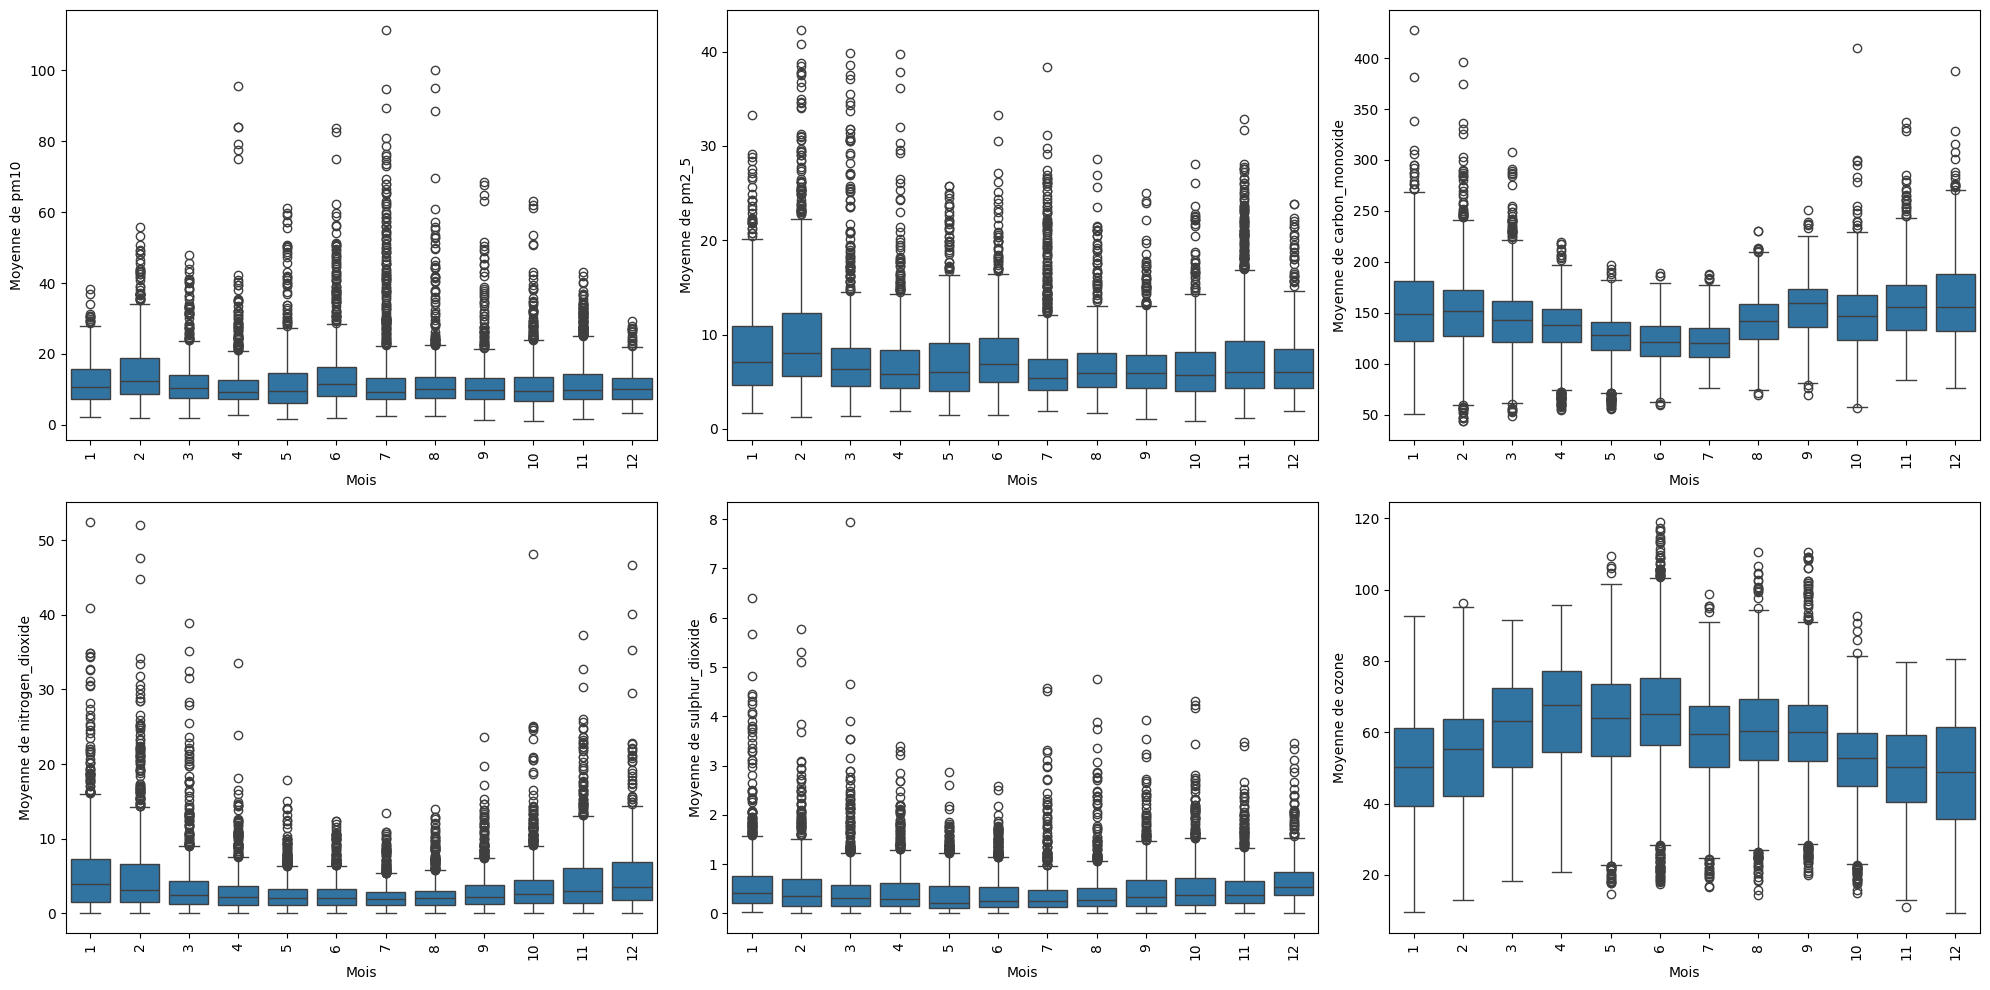

In [131]:
df_air_month=df[["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone","month"]]

# Initialiser une figure pour afficher les graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Afficher un graphique pour chaque variable
for i, column in enumerate(df_air_month.drop(columns="month")):
    ax = axes[i//3, i%3]
    sns.boxplot(x=df_air_month["month"], y=df_air_month[column], ax=ax)
    #axes[i].set_title(f'Moyenne de {column} par mois')
    ax.set_xlabel('Mois')
    ax.set_ylabel(f'Moyenne de {column}')
    ax.tick_params(axis='x', rotation=90)
    #ax.set_xticks(list(range(1,13)))  # Définit les ticks de l'axe des X aux valeurs des mois
    #ax.set_xticklabels([month_dict[m] for m in list(range(1,13))])
    
    
# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

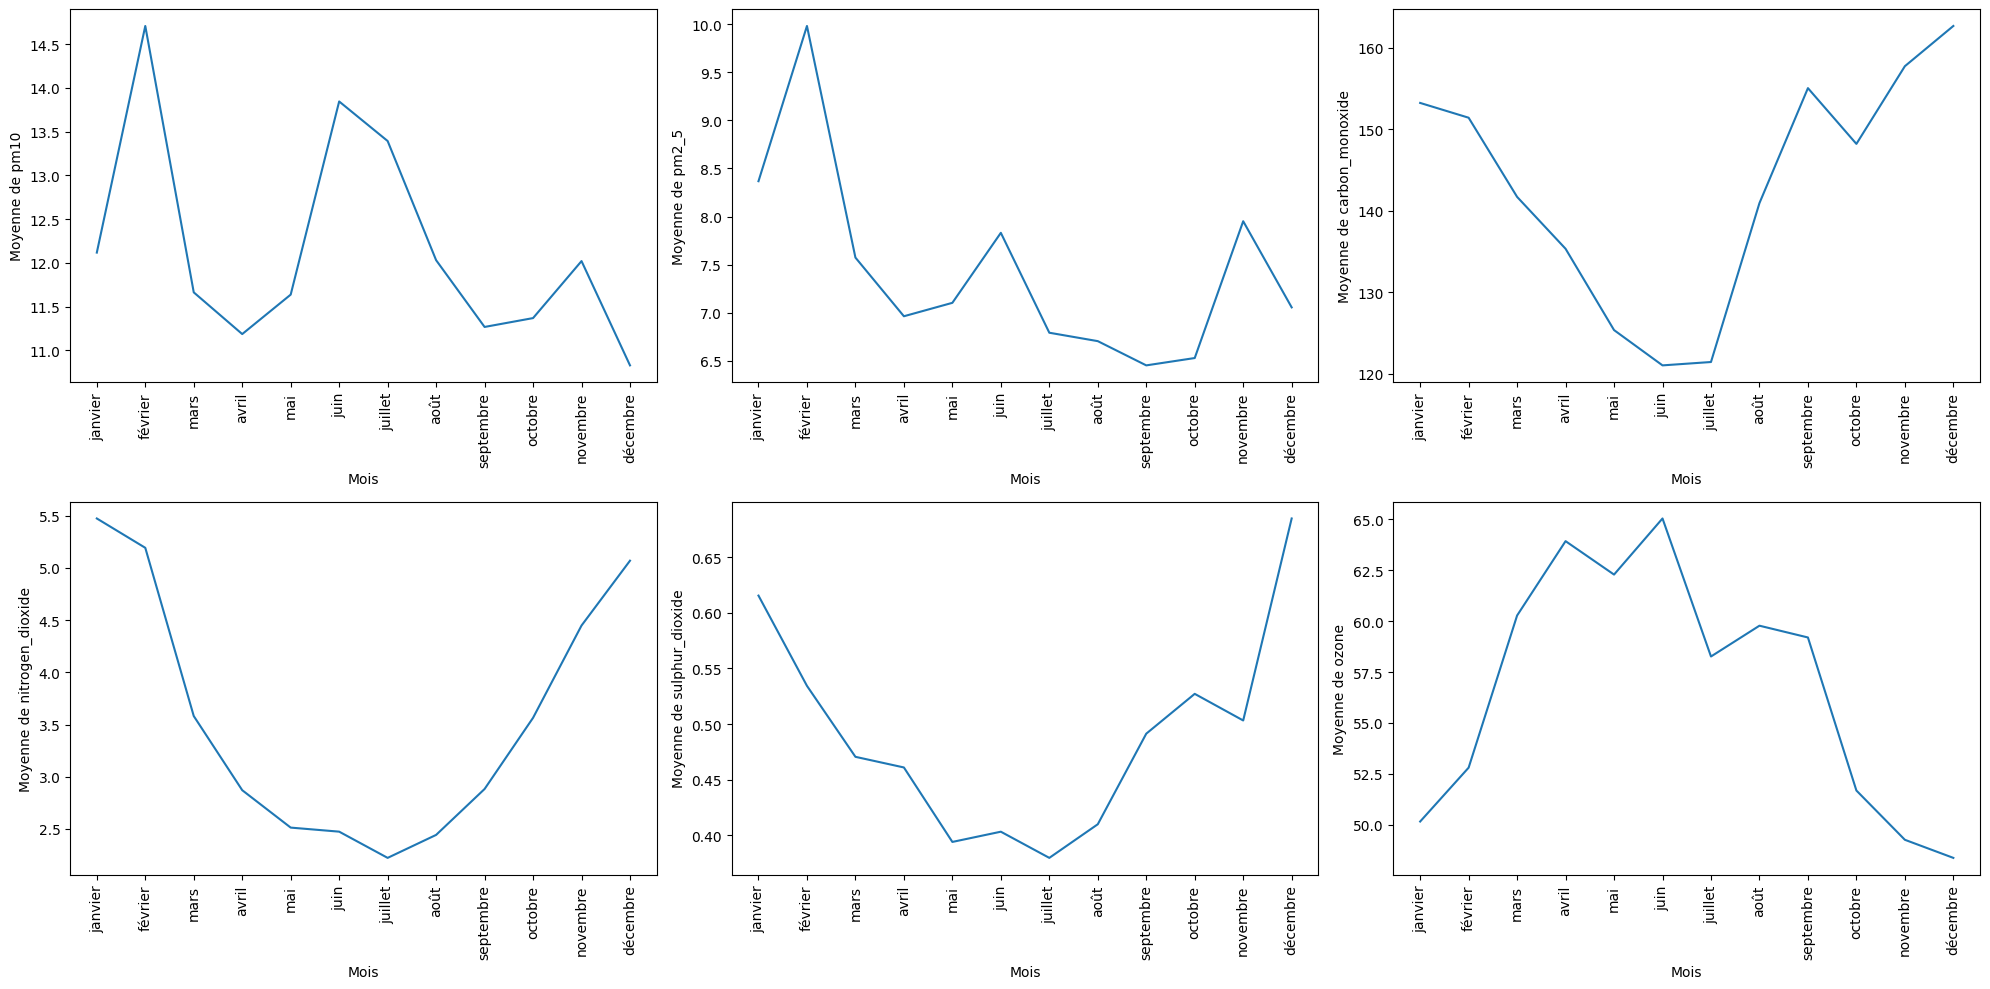

In [132]:
variables_air_month=["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone","month"]
df_air_month=df[variables_air_month].groupby("month").mean()

# Initialiser une figure pour afficher les graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Afficher un graphique pour chaque variable
for i, column in enumerate(df_air_month):
    ax = axes[i//3, i%3]
    sns.lineplot(x=df_air_month.index, y=df_air_month[column], ax=ax)
    #axes[i].set_title(f'Moyenne de {column} par mois')
    ax.set_xlabel('Mois')
    ax.set_ylabel(f'Moyenne de {column}')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(df_air_month.index)  # Définit les ticks de l'axe des X aux valeurs des mois
    ax.set_xticklabels([month_dict[m] for m in df_air_month.index])
    
    
# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [133]:
variables_air_region=["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone","region","longitude","latitude"]
df_air_region=df[variables_air_region].groupby(["region"]).mean()


In [134]:
df_air_region

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,longitude,latitude
region,,,,,,,,
Auvergne-Rhône-Alpes,11.391398,8.019738,162.072678,6.163274,0.549964,61.291965,4.536119,45.514642
Bourgogne-Franche-Comté,9.689458,6.438536,152.833267,3.534101,0.337881,65.474525,4.806857,47.234282
Bretagne,11.905880,7.311768,148.362198,3.597988,0.318262,60.775654,-2.841463,48.177549
Centre-Val de Loire,9.917185,6.694089,155.458221,3.169827,0.282143,60.993690,1.684391,47.484775
Corse,9.848196,5.443572,130.218979,1.727952,0.332905,72.720779,9.106152,42.151511
Grand Est,10.403630,7.027137,162.140778,4.012548,0.412583,61.399883,5.613112,48.688977
Guadeloupe,21.566626,10.501339,111.887444,0.801750,0.531286,49.847141,-61.539833,16.197646
Guyane,9.495708,6.344798,130.754593,0.054744,0.077711,30.264822,-53.239940,3.915167
Hauts-de-France,12.268559,8.227059,161.319870,6.272761,0.555869,55.656250,2.771303,49.969594


In [135]:
df_air_region["LIBELLE_REGION"] = df_air_region.index
gd=france.merge(df_air_region, on="LIBELLE_REGION",how="inner")

In [136]:
gd=gd.to_crs(3857)

In [137]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# Définir la palette de couleurs et la normalisation pour la variable
norm = mpl.colors.Normalize(vmin=gd['pm2_5'].min(), vmax=gd['pm2_5'].max())
cmap = plt.cm.viridis  # Choisissez votre palette de couleurs (par ex. viridis, plasma, etc.)

# Afficher la carte avec la coloration proportionnelle à la concentration de NO2

gd.plot(column='pm2_5', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, legend_kwds={'label': "Concentration pm10 ", 'orientation': "horizontal"})
# Ajuster les limites de l'axe pour que le cadre soit centré sur les géométries
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#ax.set_xlim(bounds[0], bounds[2])  # minx, maxx
#ax.set_ylim(bounds[1], bounds[3])  # miny, maxy
# Ajouter un titre
ax.set_title("Carte de chaleur de la concentration de Pm2_5")

for idx, row in gd.iterrows():
    #Récupérer le centroïde de chaque région pour le positionner correctement
    centroid = row['geometry'].centroid
    #Ajouter le nom de la région au centroïde de la géométrie
    ax.text(centroid.x, centroid.y, row['LIBELLE_REGION'], fontsize=25, ha='center', color='black', weight='bold')

# Afficher la carte
plt.show()

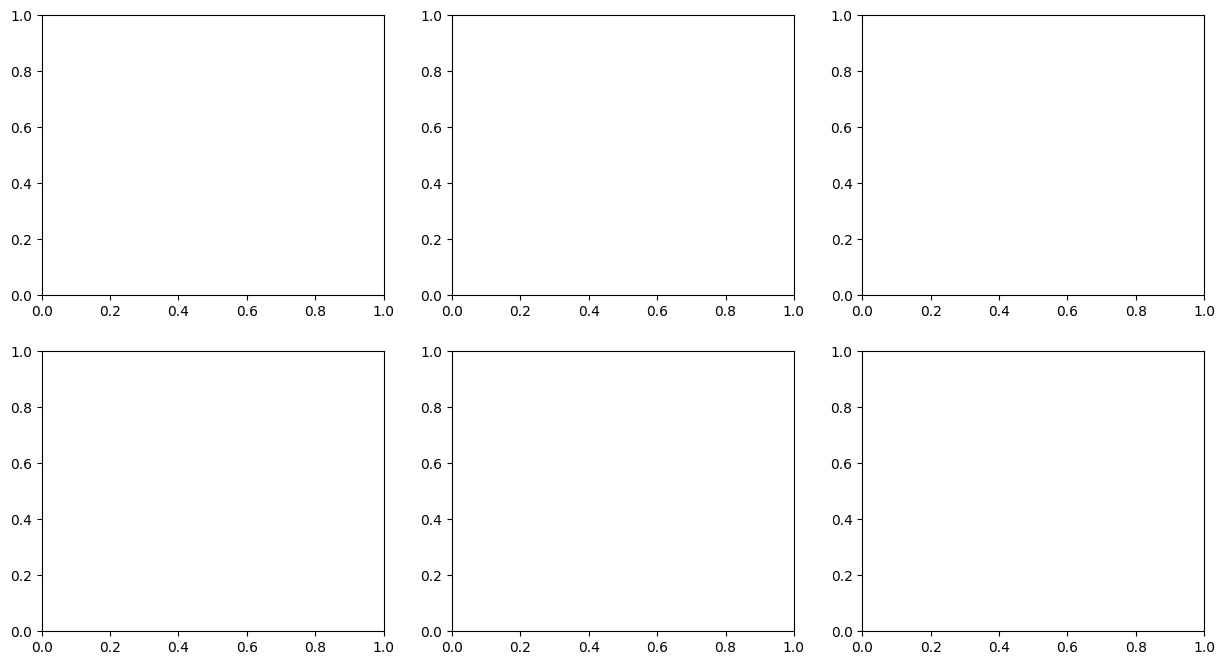

In [138]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(df_air_month):
    ax = axes[i//3, i%3]
    # Définir la palette de couleurs et la normalisation pour la variable
    norm = mpl.colors.Normalize(vmin=gd[col].min(), vmax=gd[col].max())
    cmap = plt.cm.viridis  # Choisissez votre palette de couleurs (par ex. viridis, plasma, etc.)

    # Afficher la carte avec la coloration proportionnelle à la concentration de NO2

    gd.plot(column=col, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, legend_kwds={'label': "Concentration ", 'orientation': "horizontal"})
    # Ajuster les limites de l'axe pour que le cadre soit centré sur les géométries
    #ax.set_xlim(xmin, xmax)
    #ax.set_ylim(ymin, ymax)
    # Ajouter un titre
    #ax.set_title("Carte de chaleur de la concentration de NO2")

# Afficher la carte
plt.show()

<Axes: xlabel='temperature_2m', ylabel='Count'>

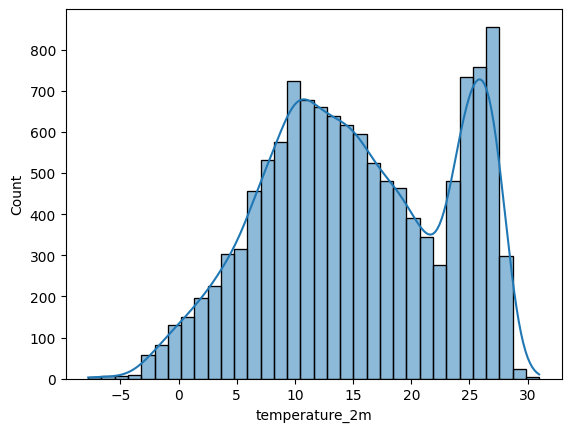

In [139]:
#pour les variables de températures
sns.histplot(df["temperature_2m"],kde=True)

In [140]:
df.drop(df[df['region'] == "Mayotte"].index, inplace=True)

In [141]:
"Guyane","Martinique","Mayotte"

('Guyane', 'Martinique', 'Mayotte')

Text(0.5, 1.0, 'Matrice de Corrélation')

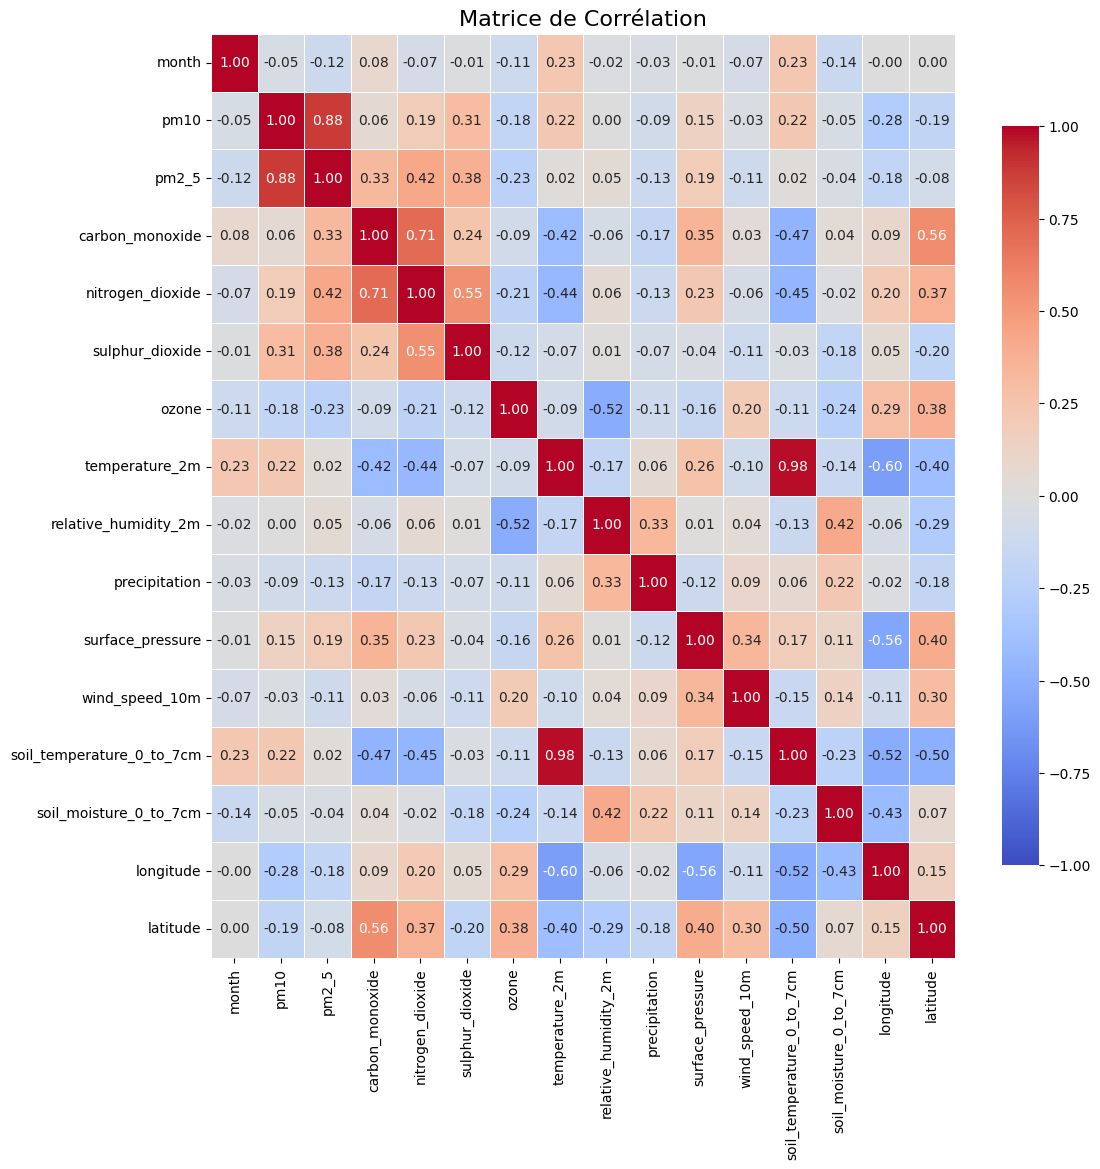

In [142]:
import numpy as np
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 12))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})

# Titre
plt.title('Matrice de Corrélation', fontsize=16)

In [143]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Exemple de données (ici des données aléatoires pour la démonstration)
np.random.seed(0)

# Génération de données aléatoires pour l'exemple
x=df[["pm2_5"]]
y=df[["carbon_monoxide", "longitude","latitude","nitrogen_dioxide", "sulphur_dioxide", "ozone","temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]]

# Division des données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Calcul du score R² (coefficient de détermination)
r2 = r2_score(y_test, y_pred)

In [148]:
r2

0.05425301566720009